<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/M1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data and features

In [2]:
! pip install wikipedia

import wikipedia
import nltk #natural language toolkit
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re #regular expansion syntax
import unicodedata
import plotly.express as px
import pandas as pd

In [3]:
#features are individual independent variables which are input to our system

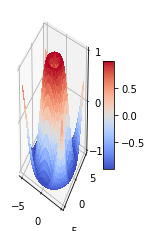

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm #cm provides colour maps
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.9))

#first subplot
#set up the axes for the first plot
ax=fig.add_subplot(1,2,1,projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25) # feature 1
Y = np.arange(-5, 5, 0.25) # feature 2
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) #output
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.4, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

In [5]:
#features of type text
#downloading a few documetns from wikipedia

In [6]:
topic1='Giraffe'
topic2='Elephant'
wikipedia.set_lang('en')
eng1=wikipedia.page(topic1).content
eng2=wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1=wikipedia.page(topic1).content
fr2=wikipedia.page(topic2).content

In [7]:
eng1

'The giraffe is a tall African mammal belonging to the genus Giraffa. Specifically, It is an even-toed ungulate. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing giraffes into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is

In [8]:
fr1

"La Girafe (Giraffa camelopardalis) est une espèce de mammifères ongulés artiodactyles, du groupe des ruminants, vivant dans les savanes africaines et répandue du Tchad jusqu'en Afrique du Sud. Son nom commun vient de l'arabe زرافة, zarāfah, mais l'animal fut anciennement appelé camélopard, du latin camelopardus, contraction de camelus (chameau) en raison du long cou et de pardus (léopard) en raison des taches recouvrant son corps. Après des millions d'années d'évolution, la girafe a acquis une anatomie unique avec un cou particulièrement allongé qui lui permet notamment de brouter haut dans les arbres.\nNeuf populations, se différenciant par leurs robes et formes, ont été décrites par les naturalistes depuis le XIXe siècle parfois comme espèces à part entière, mais généralement considérées comme simples sous-espèces jusqu'au XXIe siècle. Cependant la taxonomie des girafes est actuellement débattue parmi les scientifiques.\nL’espèce est considérée comme vulnérable par l'UICN : il y ava

In [9]:
type(eng1)

str

In [10]:
#removing all characters except 26 letters and space(so,accented characters in french are also removed).
#since we are also removing numbers this is not an ideal solution

In [11]:
def cleanup(text):
  text=text.lower() #making everything lowercase
  text=re.sub('[^a-z]+','',text) #keeps only this characters
  # + a-z occuring 1 or more times
  # * a-z occuring 0 or more times
  return text

In [12]:
eng1=cleanup(eng1)
eng2=cleanup(eng2)
fr1=cleanup(fr1)
fr2=cleanup(fr2)

In [13]:
eng1

'thegiraffeisatallafricanmammalbelongingtothegenusgiraffaspecificallyitisaneventoedungulateitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividinggiraffesintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraf

In [14]:
fr1

'lagirafegiraffacamelopardalisestuneespcedemammifresongulsartiodactylesdugroupedesruminantsvivantdanslessavanesafricainesetrpanduedutchadjusquenafriquedusudsonnomcommunvientdelarabezarfahmaislanimalfutanciennementappelcamloparddulatincameloparduscontractiondecameluschameauenraisondulongcouetdeparduslopardenraisondestachesrecouvrantsoncorpsaprsdesmillionsdannesdvolutionlagirafeaacquisuneanatomieuniqueavecuncouparticulirementallongquiluipermetnotammentdebrouterhautdanslesarbresneufpopulationssediffrenciantparleursrobesetformesonttdcritesparlesnaturalistesdepuislexixesicleparfoiscommeespcespartentiremaisgnralementconsidrescommesimplessousespcesjusquauxxiesiclecependantlataxonomiedesgirafesestactuellementdbattueparmilesscientifiqueslespceestconsidrecommevulnrableparluicnilyavaitindividusenetilnyenaplusqueensoitunediminutionapprochantenanstymologielesubstantiffminingirafeestunempruntlitaliengiraffaluimmeempruntlarabezurfapourlarabeclassiquezarfadescriptionilsagitdelanimalactuelleplusgranden

In [15]:
#using group of tokens i.e; ngrams as features instead of characters,to undertsnad the text better

In [16]:
#nltk has tokenization, parsing, classification, stemming, tagging and semantic reasoning

In [17]:
#calculating frequency of character n-grams
#n grams are grp of characters of size n

In [18]:
#converting tupplr to string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

#converting tupple of tupples to list of string
def key2string(keys):
  return [tuple2string(i) for i in keys]

# ploting the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  combined = zip(keys, values)
  #plotting the keys in alphabetical order
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

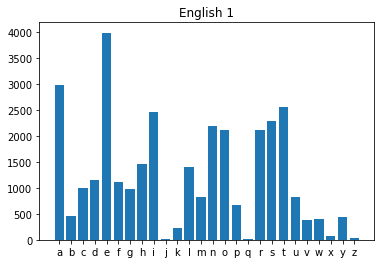

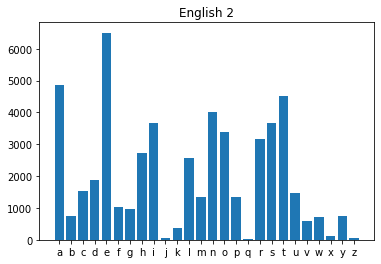

In [19]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

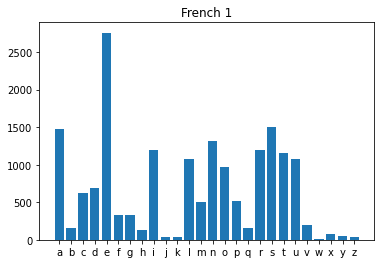

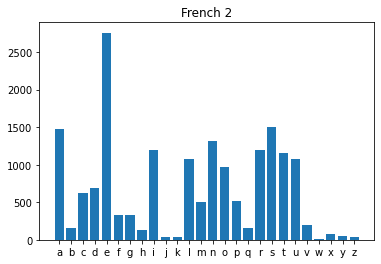

In [20]:
unigram_fr1=Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_fr2=Counter(ngrams(fr2,1))
plothistogram(unigram_fr1)
plt.title('French 2')
plt.show()

In [21]:
#a good feature is the one that helps in easy prediction and classification

In [22]:
#both english and french have similar unigrams, this unigram is not a good feature
#we will try looking at the bigrams

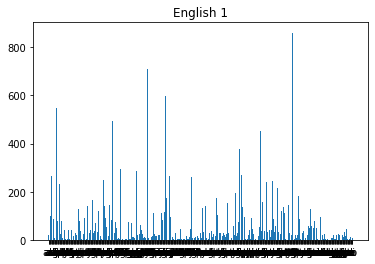

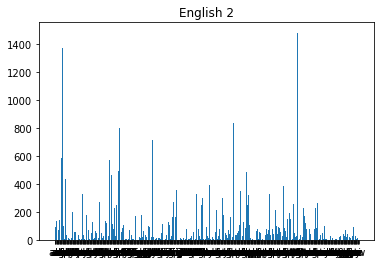

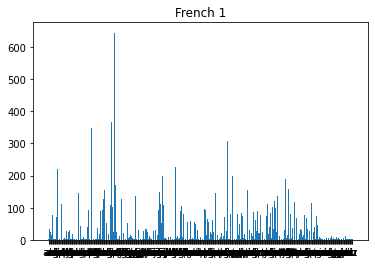

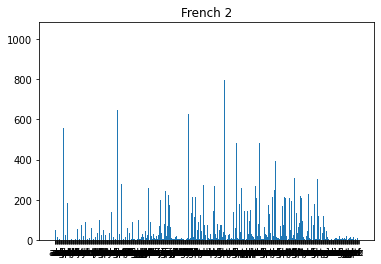

In [23]:
bigram_eng1=Counter(ngrams(eng1,2))
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2=Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1=Counter(ngrams(fr1,2))
plothistogram(bigram_fr1)
plt.title('French 1')
plt.show()

bigram_fr2=Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

In [24]:
bigram_eng1

Counter({('a', 'a'): 21,
         ('a', 'b'): 56,
         ('a', 'c'): 119,
         ('a', 'd'): 99,
         ('a', 'e'): 32,
         ('a', 'f'): 265,
         ('a', 'g'): 77,
         ('a', 'h'): 16,
         ('a', 'i'): 85,
         ('a', 'j'): 2,
         ('a', 'k'): 9,
         ('a', 'l'): 416,
         ('a', 'm'): 76,
         ('a', 'n'): 548,
         ('a', 'o'): 7,
         ('a', 'p'): 77,
         ('a', 'q'): 1,
         ('a', 'r'): 312,
         ('a', 's'): 232,
         ('a', 't'): 350,
         ('a', 'u'): 26,
         ('a', 'v'): 79,
         ('a', 'w'): 14,
         ('a', 'x'): 6,
         ('a', 'y'): 43,
         ('a', 'z'): 1,
         ('b', 'a'): 41,
         ('b', 'b'): 1,
         ('b', 'c'): 3,
         ('b', 'd'): 1,
         ('b', 'e'): 125,
         ('b', 'f'): 4,
         ('b', 'g'): 1,
         ('b', 'i'): 41,
         ('b', 'j'): 4,
         ('b', 'l'): 59,
         ('b', 'm'): 1,
         ('b', 'n'): 1,
         ('b', 'o'): 42,
         ('b', 'p'): 1,
       

In [25]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for i in range(26):
    for j in range(26):
      freq[i,j]=ngram[(chr(ord('a')+i), chr(ord('a')+j))]
  plt.imshow(freq,cmap='viridis')
  return freq

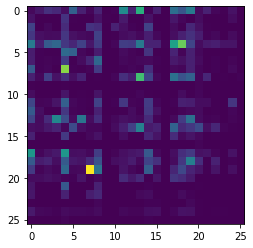

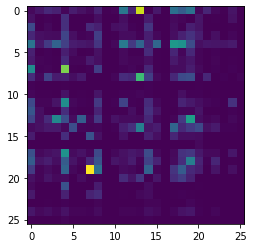

In [26]:
bieng1=plotbihistogram(bigram_eng1)
plt.show()
bieng2=plotbihistogram(bigram_eng2)
plt.show()

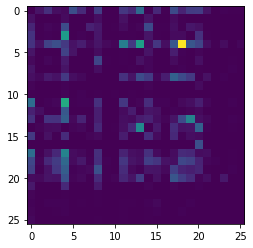

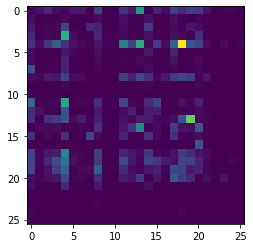

In [27]:
bifr1=plotbihistogram(bigram_fr1)
plt.show()
bifr2=plotbihistogram(bigram_fr2)
plt.show()

In [28]:
#top 10 ngrams for each text

In [29]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind=int(ind)
  i=int(ind/26)
  j=int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def showTopN(bifreq,n=10):
  f=bifreq.flatten()
  arg=np.argsort(-f)
  for i in range(n):
    print(f'{ind2tup(arg[i])} : {f[arg[i]]}')

In [30]:
print('\nEnglish 1:')
showTopN(bieng1)
print('\nEnglish 2:')
showTopN(bieng2)
print('\nFrench 1:')
showTopN(bifr1)
print('\nFrench 2:')
showTopN(bifr2)


English 1:
('t', 'h') : 861.0
('h', 'e') : 709.0
('e', 's') : 664.0
('i', 'n') : 599.0
('a', 'n') : 548.0
('e', 'r') : 493.0
('r', 'a') : 455.0
('r', 'e') : 454.0
('a', 'l') : 416.0
('n', 'd') : 399.0

English 2:
('t', 'h') : 1479.0
('a', 'n') : 1368.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 800.0
('e', 's') : 753.0
('r', 'e') : 751.0
('l', 'e') : 723.0
('h', 'a') : 716.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 277.0
('r', 'a') : 230.0
('l', 'a') : 228.0

French 2:
('e', 's') : 1032.0
('n', 't') : 794.0
('d', 'e') : 656.0
('e', 'n') : 649.0
('l', 'e') : 625.0
('a', 'n') : 556.0
('o', 'n') : 484.0
('r', 'e') : 481.0
('e', 'l') : 439.0
('s', 'e') : 392.0


In [31]:
#bigrams can be useful to distinguish languages but not topics
#we converted many dimentional input to 26(unigram) or 26*26(bigram) dimentions

In [32]:
#features of images
#images are stored as numbers in digital platform
#written numbers

In [33]:
from keras.datasets import mnist

#oading the dataset
(train_x,train_y),(text_x,text_y)=mnist.load_data()

In [34]:
train_x.shape

(60000, 28, 28)

In [35]:
text_x.shape

(10000, 28, 28)

In [36]:
#extracting a subset for data of our experiment
no0=train_x[train_y==0,:,:]
no1=train_x[train_y==1,:,:]

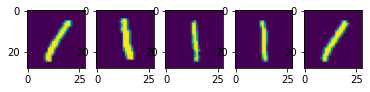

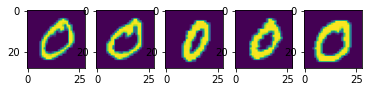

In [37]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(no1[i,:,:])
plt.show()  
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(no0[i,:,:])
plt.show()  

In [38]:
#sum of all pixels as a feature
#sum of pixel values

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

(array([  49.,  339., 1102., 1679., 1630.,  778.,  274.,   62.,    8.,
           2.]),
 array([ 90. , 116.1, 142.2, 168.3, 194.4, 220.5, 246.6, 272.7, 298.8,
        324.9, 351. ]),
 <a list of 10 Patch objects>)

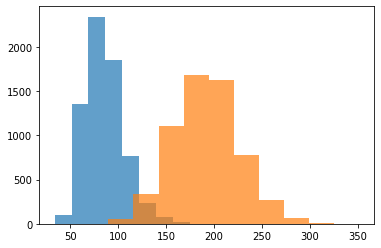

In [39]:
plt.hist(sum1, alpha=0.7)
plt.hist(sum0, alpha=0.7)

In [40]:
#more complicated feature
#number of black pixels surrounded by non-black signals on four sides
#hole pixels

In [41]:
#hole pixels
def cumArray(img):
  img2=img.copy()
  for i in range(1,img2.shape[0]):
    img2[i,:]=img2[i,:]+img2[i-1,:]
  img2=img2>0  
  return img2

def getHolePixels(img):
  im1=cumArray(img)  
  im2=np.rot90(cumArray(np.rot90(img,1)),3)
  im3=np.rot90(cumArray(np.rot90(img,2)),2)
  im4=np.rot90(cumArray(np.rot90(img,3)),1)
  hull= im1 & im2 & im3 & im4
  hole=hull & ~(img>0)
  return hole

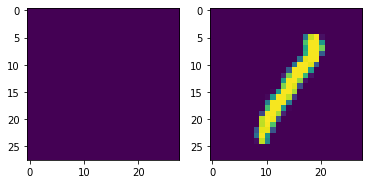

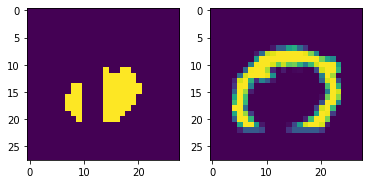

In [42]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

(array([ 163.,  663., 1199., 1355., 1138.,  834.,  401.,  127.,   36.,
           7.]),
 array([  0. ,  18.9,  37.8,  56.7,  75.6,  94.5, 113.4, 132.3, 151.2,
        170.1, 189. ]),
 <a list of 10 Patch objects>)

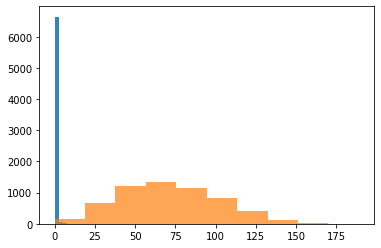

In [43]:
#number of hole pixels
hole1=np.array([getHolePixels(i).sum() for i in no1])
hole2=np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1,alpha=0.9)
plt.hist(hole2,alpha=0.7)

In [44]:
#feature- number of boundary pixels in each image
def minus(a,b):
  return a & ~b

def getBoundaryPixels(img):
  img=img.copy()>0 #binarizing the image
  rshift=np.roll(img,1,1)
  lshift=np.roll(img,-1,1)
  ushift=np.roll(img,-1,0)
  dshift=np.roll(img,1,0)
  boundary=minus(img,rshift) | minus(img,lshift) | minus(img,ushift) | minus(img,dshift)
  return boundary

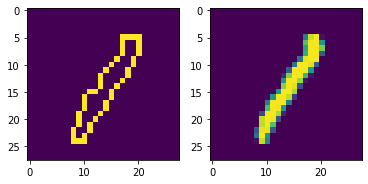

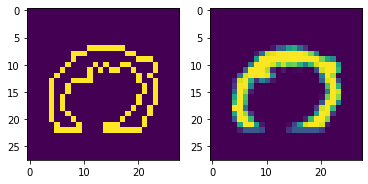

In [45]:
imgs2=[no1[456,:,:],no0[456,:,:]]
for img in imgs2:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

(array([  14.,   21.,   99.,  450., 1300., 2262., 1339.,  375.,   52.,
          11.]),
 array([ 48. ,  55.2,  62.4,  69.6,  76.8,  84. ,  91.2,  98.4, 105.6,
        112.8, 120. ]),
 <a list of 10 Patch objects>)

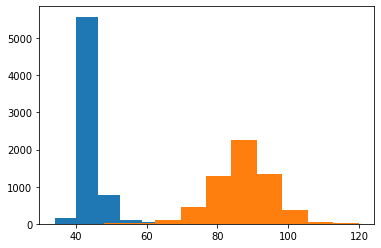

In [46]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1)
plt.hist(bound2)    

In [47]:
#featurs extraction from a csv file

In [48]:
import pandas as pd

In [49]:
df=pd.read_csv('/content/housing.csv.zip')

In [50]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [52]:
df=df.rename(columns={'oldName1':'newName1','oldName2':'newName2'})

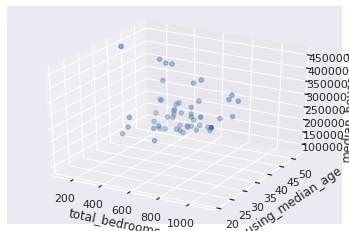

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="darkgrid")

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=df['total_bedrooms'][:50]
y=df['housing_median_age'][:50]
z=df['median_house_value'][:50]

ax.set_xlabel('total_bedrooms')
ax.set_ylabel('housing_median_age')
ax.set_zlabel('median_house_value')

ax.scatter(x,y,z)
plt.show()

In [54]:
df=pd.read_csv('/content/Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

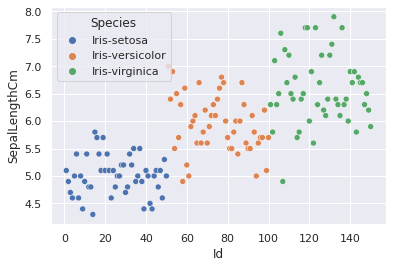

In [57]:
# sepal length as feature 
import seaborn as sns
sns.scatterplot(x='Id',y='SepalLengthCm',hue='Species',data=df)

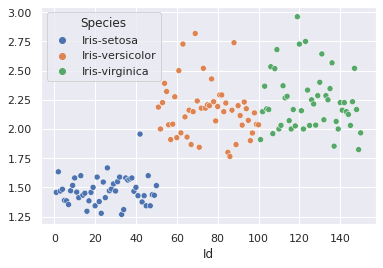

In [58]:
# speal length by sepal width as feature
z=df['SepalLengthCm']/df['SepalWidthCm']
sns.scatterplot(x='Id',y=z,hue='Species',data=df)

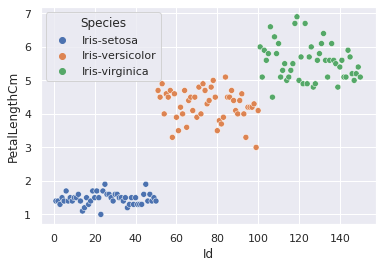

In [59]:
# Petal length as feature
sns.scatterplot(x='Id',y='PetalLengthCm',hue='Species',data=df)

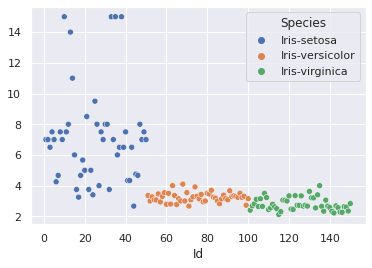

In [60]:
z=df['PetalLengthCm']/df['PetalWidthCm']
sns.scatterplot(x='Id',y=z,hue='Species',data=df)

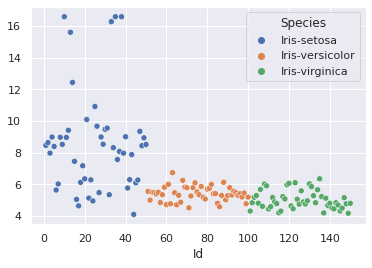

In [61]:
z=df['SepalLengthCm']/df['SepalWidthCm'] + df['PetalLengthCm']/df['PetalWidthCm']
sns.scatterplot(x='Id',y=z,hue='Species',data=df)